# Análise exploratória de dados
 - Conjunto de dados: `student_habits_performance`
---

## PRÉ-INÍCIO
 - Carregamento de bibliotecas
 - Leitura do conjunto de dados

In [ ]:
import itertools
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown


In [ ]:
# @title Leitura do conjunto de dados

"""

Agora, com o auxílio da função 'read_csv', lemos o conjunto de dados, definindo-o como a variável 'df', ou seja, dataframe.

"""
caminho_csv = ("../dados/student_habits_performance.csv")
df = carregar_dados(caminho_csv)

## LIMPEZA E PREPARAÇÃO DOS DADOS

In [3]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Ultimas linhas

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

### Quantidade de valores únicos

student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            3
internet_quality                    3
mental_health_rating               10
extracurricular_participation       2
exam_score                        480
dtype: int64

In [4]:
# @title Dicionário de dados

import pandas as pd

# Dicionário de dados completo
df_dict = pd.DataFrame([
    {
        "variavel": "student_id",
        "descricao": "Identificador único para cada estudante. Não possui valor numérico para análise.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "age",
        "descricao": "Idade do estudante em questão (em anos)",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "gender",
        "descricao": "Gênero do estudante (Male, Female, Other)",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "study_hours_per_day",
        "descricao": "Média de horas de estudo por dia",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "social_media_hours",
        "descricao": "Média de horas usando redes sociais por dia",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "netflix_hours",
        "descricao": "Média de horas assistindo Netflix (ou similares) por dia",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "part_time_job",
        "descricao": "Indica se o estudante possui um trabalho de meio período (Yes/No)",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "attendance_percentage",
        "descricao": "Percentual de presença do estudante nas aulas",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sleep_hours",
        "descricao": "Média de horas de sono por noite",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "diet_quality",
        "descricao": "Qualidade da dieta do estudante (Good, Fair, Poor)",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "exercise_frequency",
        "descricao": "Frequência de exercícios físicos por semana (0 a 6+ vezes)",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "parental_education_level",
        "descricao": "Nível de escolaridade mais alto dos pais (Master, Bachelor, High School, None)",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "internet_quality",
        "descricao": "Qualidade percebida da conexão de internet (Good, Average, Poor)",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "mental_health_rating",
        "descricao": "Autoavaliação da saúde mental em uma escala de 1 a 10",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "extracurricular_participation",
        "descricao": "Indica se o estudante participa de atividades extracurriculares (Yes/No)",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "exam_score",
        "descricao": "Pontuação do estudante no exame (variável alvo/dependente)",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
])

df_dict

,variavel,descricao,tipo,subtipo
0,student_id,Identificador único para cada estudante. Não p...,qualitativa,nominal
1,age,Idade do estudante em questão (em anos),quantitativa,discreta
2,gender,"Gênero do estudante (Male, Female, Other)",qualitativa,nominal
3,study_hours_per_day,Média de horas de estudo por dia,quantitativa,contínua
4,social_media_hours,Média de horas usando redes sociais por dia,quantitativa,contínua
5,netflix_hours,Média de horas assistindo Netflix (ou similare...,quantitativa,contínua
6,part_time_job,Indica se o estudante possui um trabalho de me...,qualitativa,nominal
7,attendance_percentage,Percentual de presença do estudante nas aulas,quantitativa,contínua
8,sleep_hours,Média de horas de sono por noite,quantitativa,contínua
9,diet_quality,"Qualidade da dieta do estudante (Good, Fair, P...",qualitativa,ordinal


In [5]:
# @title Tratamento de dados faltantes

if df['parental_education_level'].isnull().sum() > 0:
    moda_educacao = df['parental_education_level'].mode()[0]
    df['parental_education_level'].fillna(moda_educacao, inplace=True)
    print(f"Valores nulos em 'parental_education_level' preenchidos com a moda: '{moda_educacao}'")

Valores nulos em 'parental_education_level' preenchidos com a moda: 'High School'


C:\Users\dinow\AppData\Local\Temp\ipykernel_25360\3619357577.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(moda_educacao, inplace=True)


In [6]:
# @title Verificação e Remoção de Duplicatas

duplicatas = df.duplicated().sum()
if duplicatas > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicatas} linhas duplicadas foram removidas.")
else:
    print("Nenhuma linha duplicada encontrada.")

Nenhuma linha duplicada encontrada.


## DEFINIÇÃO E ANÁLISE DA VARIÁVEL DE CLASSE

In [7]:
# @title Discretização da variável 'exam_score'

bins = [0, 50, 85, 100]
labels = ['Baixo', 'Médio', 'Alto']
df['performance_class'] = pd.cut(df['exam_score'], bins=bins, labels=labels, right=False)
print("Coluna 'performance_class' criada a partir de 'exam_score' com as novas definições de classes.")

Coluna 'performance_class' criada a partir de 'exam_score' com as novas definições de classes.


In [8]:
# @title Análise da Distribuição da Classe

display(Markdown("### Distribuição das Classes de Desempenho"))
class_distribution = df['performance_class'].value_counts().reset_index()
class_distribution.columns = ['Classe de Desempenho', 'Número de Alunos']
display(class_distribution)

### Distribuição das Classes de Desempenho

,Classe de Desempenho,Número de Alunos
0,Médio,681
1,Alto,140
2,Baixo,131


C:\Users\dinow\AppData\Local\Temp\ipykernel_25360\3380311945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='performance_class', palette='viridis', order=['Baixo', 'Médio', 'Alto'])


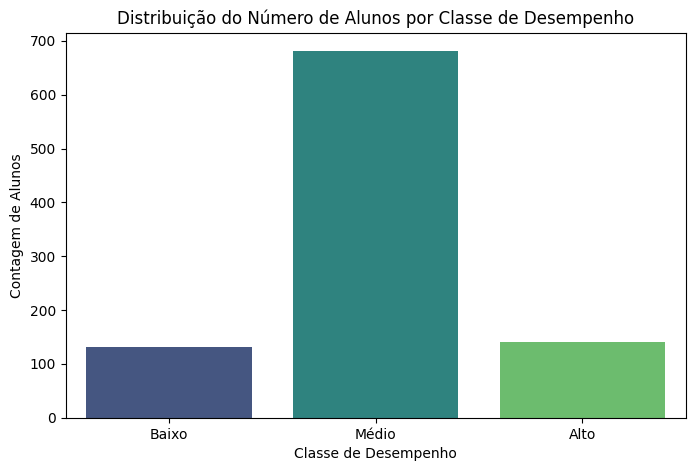

In [9]:
# @title Visualização da distribuição

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='performance_class', palette='viridis', order=['Baixo', 'Médio', 'Alto'])
plt.title('Distribuição do Número de Alunos por Classe de Desempenho')
plt.xlabel('Classe de Desempenho')
plt.ylabel('Contagem de Alunos')
plt.show()

## DESCRIÇÃO FORMAL E ESTATÍSTICAS GERAIS

In [10]:
N = df.shape[0]
D = df.shape[1] - 3  # Total de colunas - student_id - exam_score - performance_class
L = df['performance_class'].nunique()

print(f"O conjunto de dados analisado possui N = {N} observações.")
print(f"Cada observação é descrita por D = {D} variáveis preditoras.")
print(f"A variável alvo foi discretizada em L = {L} classes: {list(df['performance_class'].cat.categories)}.")
print("A distribuição das classes é apresentada na tabela e gráfico acima.")

display(Markdown("### Estatísticas Descritivas Gerais de Todas as Variáveis"))
display(df.describe(include='all').drop('student_id', axis=1))

O conjunto de dados analisado possui N = 1000 observações.
Cada observação é descrita por D = 14 variáveis preditoras.
A variável alvo foi discretizada em L = 3 classes: ['Baixo', 'Médio', 'Alto'].
A distribuição das classes é apresentada na tabela e gráfico acima.


### Estatísticas Descritivas Gerais de Todas as Variáveis

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance_class
count,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,952
unique,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN,3
top,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN,Médio
freq,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,483,447,NaN,682,NaN,681
mean,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500,NaN
std,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564,NaN
min,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000,NaN
25%,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000,NaN
50%,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000,NaN
75%,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000,NaN
